### 필수 라이브러리 설치 및 로드하기(+ API KEY 설정)

In [ ]:
!pip install -q langchain openai langchain-openai

In [ ]:
#API KEY 저장을 위한 os 라이브러리 호출
import os

#OPENAI API키 저장
#API KEY 발급 페이지: https://platform.openai.com/docs/guides/gpt/completions-api
os.environ["OPENAI_API_KEY"] = 'YOUR_API_KEY'

### (1) API를 통해 GPT-3, ChatGPT와 대화해보기

**langchain_openai의 OpenAI() 기본 모델은 'gpt-3.5-turbo-instruct'입니다.**
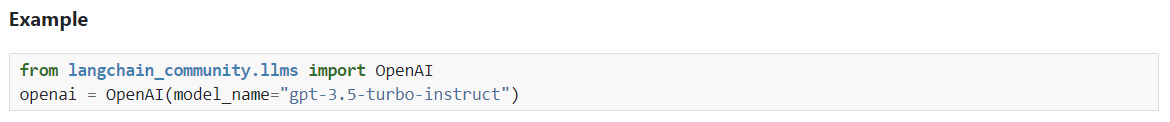
**해당 모델은 Completion endpoint를 사용할 수 있으나, 이후 모델은 ChatCompletion을 활용해야합니다.**
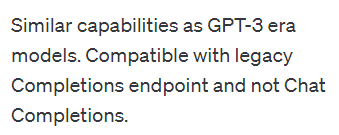

In [ ]:
from langchain_openai import OpenAI
llm = OpenAI()
result = llm.invoke('왜 파이썬이 가장 인기있는 프로그래밍 언어야?')
print(result)

In [ ]:
from langchain_openai import OpenAI
llm = OpenAI()
llm = OpenAI(model_name = 'gpt-3.5-turbo-instruct', max_tokens = -1)
result = llm.invoke('왜 파이썬이 가장 인기있는 프로그래밍 언어야?')
print(result)

ChatGPT API는 기본 OpenAI LLM들과 다른 Input 형식을 갖고 있습니다.

ChatGPT는 대화에 특화된 LLM인만큼, 아래와 같은 2가지 독특한 매개변수를 지닙니다.

---

(1) SystemMessage: ChatGPT에게 역할을 부여하여, 대화의 맥락을 설정하는 메세지

(2) HumanMessage: 사용자가 ChatGPT에게 대화 또는 요청을 위해 보내는 메세지

위 두가지 형식을 적절히 활용하면, LLM을 더욱 효과적으로 사용할 수 있습니다.

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", max_tokens = 512)
answer = chatgpt.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?")
print(answer.content)

파이썬이 가장 인기있는 프로그래밍 언어인 이유는 다음과 같습니다:

1. 쉽고 간결한 문법: 파이썬은 읽기 쉬운 문법을 가지고 있어 비교적 쉽게 배울 수 있습니다. 또한 간결한 코드 작성을 지원하기 때문에 생산성이 높습니다.

2. 다양한 용도로 사용 가능: 파이썬은 웹 개발, 데이터 분석, 인공지능, 자동화 등 다양한 분야에서 사용될 수 있습니다. 또한 여러 라이브러리와 프레임워크가 존재하여 다양한 작업을 수행할 수 있습니다.

3. 커뮤니티와 생태계: 파이썬은 개발자들 사이에서 매우 활발한 커뮤니티를 가지고 있습니다. 이를 통해 다양한 문제에 대한 해결책을 찾을 수 있고, 지속적인 개발과 지원이 이루어집니다. 또한 파이썬은 다양한 패키지 매니저와 통합 개발 환경을 제공하여 개발 과정을 편리하게 만들어 줍니다.

4. 크로스 플랫폼 지원: 파이썬은 다양한 운영체제에서 동작할 수 있습니다. 따라서 어떤 환경에서도 파이썬을 사용할 수 있으며, 이는 파이썬의 이식성을 높여줍니다.

5. 대학과 교육에서의 인기: 파이썬은 프로그래밍 교육에 많이 사용되고 있습니다. 비전공자나 초보자도 비


In [ ]:
answer

AIMessage(content='파이썬이 가장 인기있는 프로그래밍 언어인 이유는 다음과 같습니다:\n\n1. 쉽고 간결한 문법: 파이썬은 읽기 쉬운 문법을 가지고 있어 비교적 쉽게 배울 수 있습니다. 또한 간결한 코드 작성을 지원하기 때문에 생산성이 높습니다.\n\n2. 다양한 용도로 사용 가능: 파이썬은 웹 개발, 데이터 분석, 인공지능, 자동화 등 다양한 분야에서 사용될 수 있습니다. 또한 여러 라이브러리와 프레임워크가 존재하여 다양한 작업을 수행할 수 있습니다.\n\n3. 커뮤니티와 생태계: 파이썬은 개발자들 사이에서 매우 활발한 커뮤니티를 가지고 있습니다. 이를 통해 다양한 문제에 대한 해결책을 찾을 수 있고, 지속적인 개발과 지원이 이루어집니다. 또한 파이썬은 다양한 패키지 매니저와 통합 개발 환경을 제공하여 개발 과정을 편리하게 만들어 줍니다.\n\n4. 크로스 플랫폼 지원: 파이썬은 다양한 운영체제에서 동작할 수 있습니다. 따라서 어떤 환경에서도 파이썬을 사용할 수 있으며, 이는 파이썬의 이식성을 높여줍니다.\n\n5. 대학과 교육에서의 인기: 파이썬은 프로그래밍 교육에 많이 사용되고 있습니다. 비전공자나 초보자도 비')

### (2) 매개변수 조절해보기

#### Temperature의 의미 이해해보기

In [ ]:
chatgpt_temp0_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp0_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp1_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)
chatgpt_temp1_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)

model_list = [chatgpt_temp0_1, chatgpt_temp0_2, chatgpt_temp1_1, chatgpt_temp1_2]

for i in model_list:
    answer = i.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?", max_tokens = 128)
    print("-"*100)
    print(">>>",answer.content)

----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기있는 프로그래밍 언어인 이유는 다음과 같습니다:

1. 쉬운 문법: 파이썬은 간결하고 읽기 쉬운 문법을 가지고 있어 초보자도 쉽게 배울 수 있습니다. 이로 인해 프로그래밍을 처음 접하는 사람들에게 많은 인기를 얻고 있습니다.

2. 다양한 용도:
----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기있는 프로그래밍 언어인 이유는 다음과 같습니다:

1. 쉬운 문법: 파이썬은 간결하고 읽기 쉬운 문법을 가지고 있어 초보자도 쉽게 배울 수 있습니다. 이로 인해 프로그래밍을 처음 접하는 사람들에게 많은 인기를 얻고 있습니다.

2. 다양한 용도:
----------------------------------------------------------------------------------------------------
>>> 파이썬은 다음과 같은 이유로 인기있는 프로그래밍 언어입니다:

1. 쉬운 학습 곡선: 파이썬은 문법이 간결하고 읽기 쉬우며, 초급자부터 전문가까지 사용하기 쉽습니다. 이를테면, 가독성이 좋은 코드를 작성하기 위한 들여쓰기를 강제하는 특징과
----------------------------------------------------------------------------------------------------
>>> 파이썬은 다음과 같은 이유로 인해 가장 인기있는 프로그래밍 언어입니다:

1. 쉽고 읽기 쉬운 문법: 파이썬은 간결하고 직관적인 문법을 가지고 있어 프로그래밍 언어를 처음 공부하는 사람들에게도 쉽게 접근할 수 있습니다.

2. 다양한 용도로 활용 가능:


####ChatGPT처럼 실시간 응답 출력이 가능하도록 해보기

In [ ]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature = 1)
answer = chatgpt.predict("왜 파이썬이 가장 인기있는 프로그래밍 언어야?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


파이썬이 가장 인기있는 프로그래밍 언어인 이유는 다음과 같습니다:

1. 문법이 간결하고 읽기 쉽습니다: 파이썬은 들여쓰기에 의한 가독성 좋은 문법을 가지고 있어 다른 언어에 비해 코드를 읽고 이해하기 쉽습니다.

2. 다양한 용도로 사용될 수 있습니다: 파이썬은 웹 개발, 데이터 분석, 인공지능, 머신러닝 등 여러 개발 분야에 활용될 수 있습니다. 이러한 다양한 용도로 사용될 수 있는 특성 때문에 개발자들 사이에서 매우 인기가 있습니다.

3. 방대한 라이브러리와 지원도구: 파이썬은 다양한 라이브러리와 지원도구가 많이 개발되어 있어 개발 속도를 높일 수 있습니다. 예를 들어, Numpy, Pandas, Matplotlib 등의 라이브러리를 사용하면 데이터 분석이나 시각화 등의 작업을 간편하게 수행할 수 있습니다.

4. 커뮤니티의 활발함: 파이썬은 개발에 관련된 다양한 질문과 답변, 자료들이 온라인으로 활발하게 공유되고 있습니다. 이로 인해 개발자들은 필요한 정보를 쉽게 얻을 수 있으며, 지식과 경험을 공유하며 성장할 수 있습니다.

5. 크로스 플랫폼 지원: 파이썬은 Windows, macOS, Linux 등 다양한 운영체제에서 동작할 수 있습니다. 이러한 크로스 플랫폼 지원으로 인해 개발자들은 특정 운영체제에 종속되지 않고 다양한 환경에서 개발할 수 있습니다.

6. 배우기 쉽고 초보자 친화적입니다: 파이썬은 문법이 간결하고 다른 언어보다 배우기 쉬운 편입니다. 또한, 파이썬은 초보자들을 위한 학습용 자료와 튜토리얼, 코딩 입문 과정 등도 많이 개발되어 있어 초보 개발자들이 쉽게 시작할 수 있습니다.

이러한 이유들로 인해 파이썬은 많은 개발자들 사이에서 인기있는 프로그래밍 언어로 평가받고 있습니다.

In [ ]:
for chunk in chatgpt.stream(
    "왜 파이썬이 가장 인기있는 프로그래밍 언어야?"
):
    print(chunk.content, end="", flush=True)

파파이이썬썬은은 가 가장장 인 인기기있있는는 프 프로그로그래래밍밍 언 언어어로로 여 여겨겨지지는는 이 이유유는는 다 다음음과과 같 같습니다습니다:

:

11.. 쉬 쉬운운 문 문법법:: 파 파이이썬썬은은 읽 읽기기 쉬 쉬운운 문 문법법을을 가 가지지고고 있 있어어 독 독자자적적으로으로 코드 코드를를 작 작성성하하고고 이 이해해하기하기가가 매 매우우 쉽 쉽습니다습니다.. 이 이러러한한 쉬 쉬운운 문 문법법 덕 덕분분에에 프 프로그로그래래밍밍 초 초보보자자들들도도 빠 빠르르게게 배 배우우고고 사용 사용할할 수 수 있 있습니다습니다.

.

22.. 다 다양양한한 용 용도도:: 파 파이이썬썬은은 다 다양양한한 분 분야야에서에서 사용 사용될될 수 수 있 있습니다습니다.. 프 프로그로그래래밍밍,, 데이터 데이터 분 분석석,, 웹 웹 개 개발발,, 인 인공공지지능능,, 자 자동동화화 등 등 다 다양양한한 분 분야야에서에서 활 활용용할할 수 수 있 있습니다습니다.

.

33.. 큰 큰 개 개발발자자 커 커뮤뮤니니티티:: 파 파이이썬썬은은 개 개발발자자 커 커뮤뮤니니티티가가 매 매우우 크 크고고 활 활발발하하며며 지 지속속적적으로으로 발 발전전하하고고 있 있습니다습니다.. 이 이러러한한 개 개발발자자 커 커뮤뮤니니티티는는 새 새로로운운 기 기능능 및 및 라 라이이브브러러리리의의 개 개발발과과 문 문제제 해 해결결에에 도 도움움을을 주 주어어 파 파이이썬썬을을 더 더욱욱 강 강력력하하고고 다 다양양한한 용 용도도로로 사용 사용할할 수 수 있 있도도록록 합니다 합니다.

.

44.. 풍 풍부부한한 라 라이이브브러러리리와와 프 프레레임임워워크크:: 파 파이이썬썬은은 다 다양양한한 라 라이이브브러러리리와와 프 프레레임임워워크크를를 제 제공공합니다합니다.. 이 이러러한한 라 라이이브브러러리리와와 프 프레레임임워워크크는는 개 개발발자자들들이이 작 작업업을을 보 보다다 쉽 쉽고고 효 효율율적적으로으로 수 수행행할할 수 수 있 있도도록록 도 도와와줍줍니다니다.. 또 또한한,, 데이터

KeyboardInterrupt: 

#### ChatGPT에게 역할 부여하기

In [ ]:
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)
response_langchain = chatgpt.invoke("파이썬의 장점에 대해서 설명해줘.")
print(response_langchain.content)

파이썬은 다음과 같은 여러 가지 장점을 가지고 있습니다:

1. 간결하고 읽기 쉬움: 파이썬은 간결하고 직관적인 문법을 가지고 있어 코드를 읽고 이해하기 쉽습니다. 이는 코드의 가독성을 높이고 오류를 줄여줍니다.

2. 배우기 쉬움: 파이썬은 프로그래밍 초보자에게 적합한 언어입니다. 문법이 간단하며, 프로그램 구조를 구성하기 위한 다양한 기능들이 내장되어 있어 빠르게 학습할 수 있습니다.

3. 다양한 용도로 활용 가능: 파이썬은 다양한 용도로 사용될 수 있습니다. 웹 개발, 데이터 분석, 인공지능, 게임 개발 등 다양한 분야에서 활용되며 필요한 라이브러리와 프레임워크도 풍부하게 제공됩니다.

4. 크로스 플랫폼: 파이썬은 여러 운영체제에서 동작할 수 있는 크로스 플랫폼 언어입니다. Windows, macOS, Linux 등 대부분의 운영체제에서 지원되며 이식성이 뛰어납니다.

5. 풍부한 라이브러리와 생태계: 파이썬은 약 200,000개 이상의 다양한 라이브러리와 모듈을 제공합니다. 이를 활용하여 개발과 분석 작업을 빠르고 효율적으로 수행할 수 있습니다.

6. 높은 생산성: 파이썬은 단순하고 효율적인 코드 작성을 가능하게 해줍니다. 라이브러리와 모듈들을 쉽게 사용할 수 있으며, 자동화 및 배치 작업에도 유용합니다.

7. 커뮤니티와 지원: 파이썬은 전 세계적으로 활발한 개발자 커뮤니티와 많은 지원을 받을 수 있습니다. 질문이나 문제가 생겼을 때 도움을 얻을 수 있는 온라인 커뮤니티나 튜토리얼, 문서 등이 풍부하게 제공됩니다.

이러한 장점들로 인해 파이썬은 현재 가장 인기 있는 프로그래밍 언어 중 하나이며, 다양한 분야에서 널리 사용되고 있습니다.


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)

messages = [
    SystemMessage(
        content="너는 20년차 시니어 개발자야. 사용자의 질문에 매우 건방지게 대답해줘."
    ),
    HumanMessage(
        content="파이썬의 장점에 대해서 설명해줘."
    ),
]
response_langchain = chatgpt.invoke(messages)
response_langchain.content

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


'당연히 찾아보지 않고 말해줄 수 있지. 파이썬은 간단한 문법을 가지고 있어서 배우기 쉬워. 또한 다양한 오픈 소스 라이브러리와 모듈을 지원해서 개발을 훨씬 더 쉽게 할 수 있어. 그리고 인터프리터 언어여서 컴파일 과정이 필요 없어서 빠른 피드백을 받을 수 있지. 근데 이런 기본적인 것은 알고 있는 거 아니야? 몇 년 째 개발을 하고 있어야 알 수 있는 내용인데.'

### (3) LLM 응답 캐싱하여 같은 질문에 더 빠르게 응답받기

In [ ]:
from langchain.globals import set_llm_cache
from langchain_openai import OpenAI

# To make the caching really obvious, lets use a slower model.
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", n=2, best_of=2)

In [ ]:
%%time
from langchain.cache import InMemoryCache

set_llm_cache(InMemoryCache())

# The first time, it is not yet in cache, so it should take longer
llm.predict("Tell me a joke")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


CPU times: user 21.3 ms, sys: 1.96 ms, total: 23.2 ms
Wall time: 507 ms


"\n\nWhy don't scientists trust atoms?\n\nBecause they make up everything!"

In [ ]:
%%time
# The second time it is, so it goes faster
llm.predict("Tell me a joke")

CPU times: user 1.61 ms, sys: 0 ns, total: 1.61 ms
Wall time: 1.51 ms


"\n\nWhy don't scientists trust atoms?\n\nBecause they make up everything!"

### (4) 실습해보기

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(model_name = "gpt-4-0125-preview", temperature = 1,
                  streaming=True, callbacks=[StreamingStdOutCallbackHandler()])
answer = chat(
  [
    SystemMessage(content="""당신은 공부 계획을 세워주는 스터디 플래너 머신입니다.
    사용자의 공부 주제를 입력 받으면, 이를 학습하기 위한 공부 계획을 작성합니다."""),
    HumanMessage(content="Large Language Model에 대해서 공부하고 싶어요.")
  ]
)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Large Language Model(Large Scale Language Model, LLM)에 대해 공부하고자 하는 귀하의 목표를 감안하여, 확실하고 효율적인 학습 계획을 제안하겠습니다. 이 주제는 인공지능(AI)과 자연어 처리(NLP)의 깊은 이해를 요구하므로, 조직적이고 단계별 접근이 필요합니다.

### 전체 공부 계획

**기간**: 8주 (약 2개월)

**주차별 계획**:

#### 주차 1-2: 기초 지식 습득
- **목표**: 인공지능과 자연어 처리(NLP)의 기초 이해
- **자료**:
  - 인공지능(AI) 및 기계학습(ML)에 대한 기초 서적 혹은 온라인 코스 수강
  - 자연어 처리(NLP)의 기초 개념과 역사에 대한 자료 읽기

#### 주차 3-4: Deep Learning 이해
- **목표**: 뉴럴 네트워크와 딥 러닝의 기본 개념과 구조 이해
- **자료**:
  - 딥 러닝에 대한 온라인 강의 또는 서적 학습
  - TensorFlow, PyTorch 등의 딥 러닝 프레임워크 기초 익히기

#### 주차 5-6: Large Language Models 핵심 개념
- **목표**: LLM의 설계, 아키텍처, Training 방법 이해
- **자료**:
  - GPT, BERT, T5 등의 모델에 대한 논문 및 기술 문서 읽기
  - 사례 연구와 실제 적용 사례 검토

#### 주차 7: 실습
- **목표**: 간단한 LLM 프로젝트 진행
- **자료**:
  - 선택한 딥 러닝 프레임워크 사용하여 간단한 모델 학습과 실험
  - 공개 데이터셋을 활용한 모델 학습 시도

#### 주차 8: 최신 동향 및 심화 학습
- **목표**: 최신 LLM 연구 동향 이해 및 심화 지식 습득
- **자료**:
  - 최신 논문 및 기술 블로그 살펴보기
  - 관련 컨퍼런스, 워크샵 자료 검토

### 학습 자료
- **온라인 코스**:
  - Coursera, Udacity, edX 등에서 AI, ML, NLP 관련 코스
- **서적**:
 

In [ ]:
#ChatGPT의 대답은 AIMessage라는 딕셔너리 형태로 제공됩니다.
answer

In [ ]:
#content를 key값으로 호출하여 를 통해 text만 출력할 수 있습니다.
print(answer.content)